# Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(1)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0


In [3]:
df.shape

(90, 18)

## Plots (1-6)

### Payload vs Flight

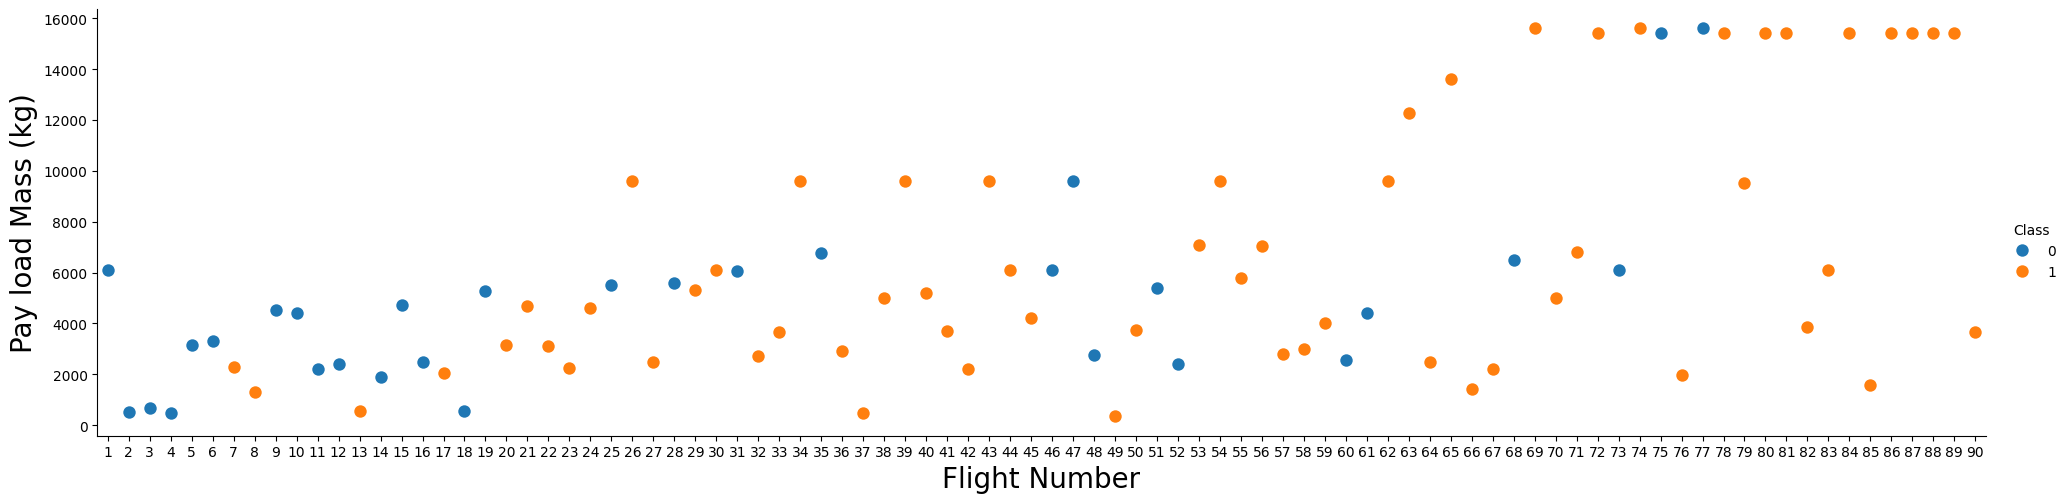

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, s=80, aspect = 4)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Pay load Mass (kg)", fontsize=20)
plt.show()

### Launch Site vs Flight (TASK 1)

<Figure size 800x300 with 0 Axes>

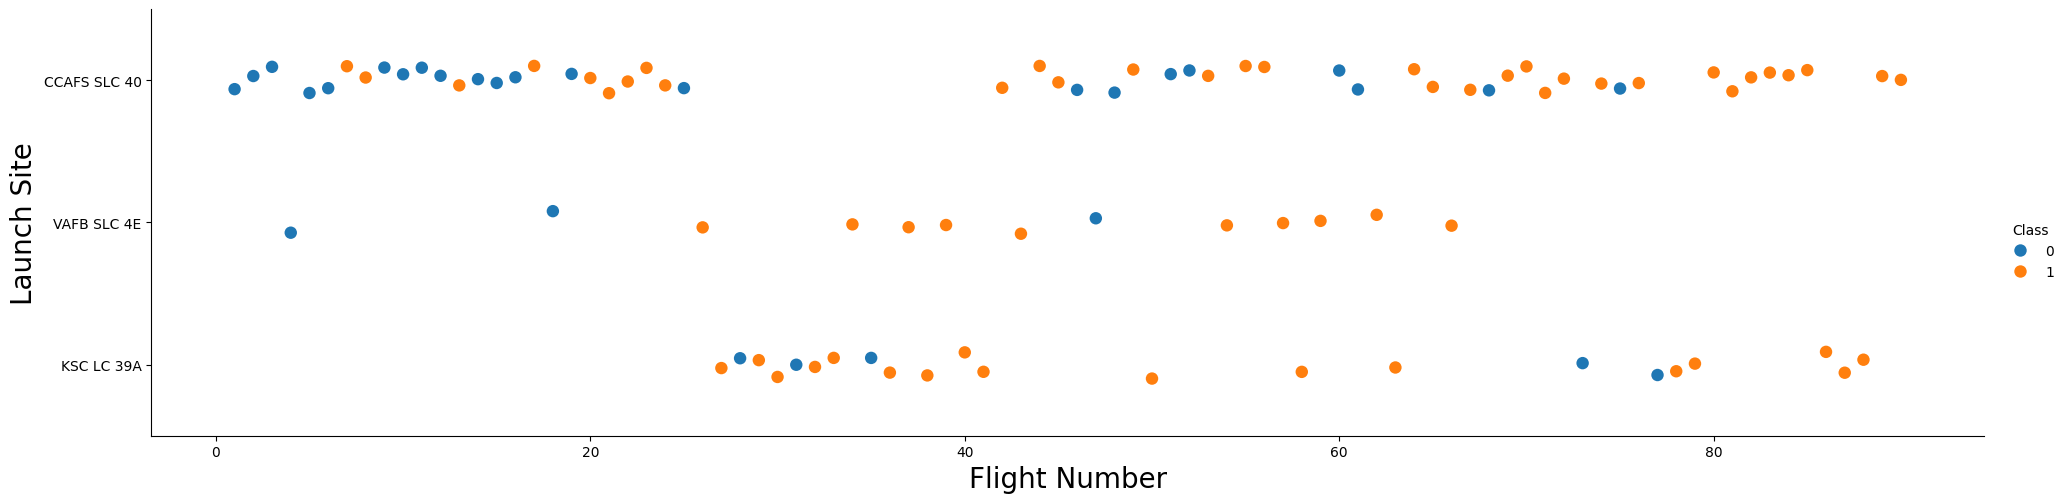

In [5]:
plt.figure(figsize=(8,3))
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, s=80, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

In [6]:
# sns.catplot(y="LaunchSite",x="FlightNumber",hue="Class", data=df, aspect = 1,kind=’cat’)

### Payload vs Launch Site (TASK 2)

<Figure size 800x300 with 0 Axes>

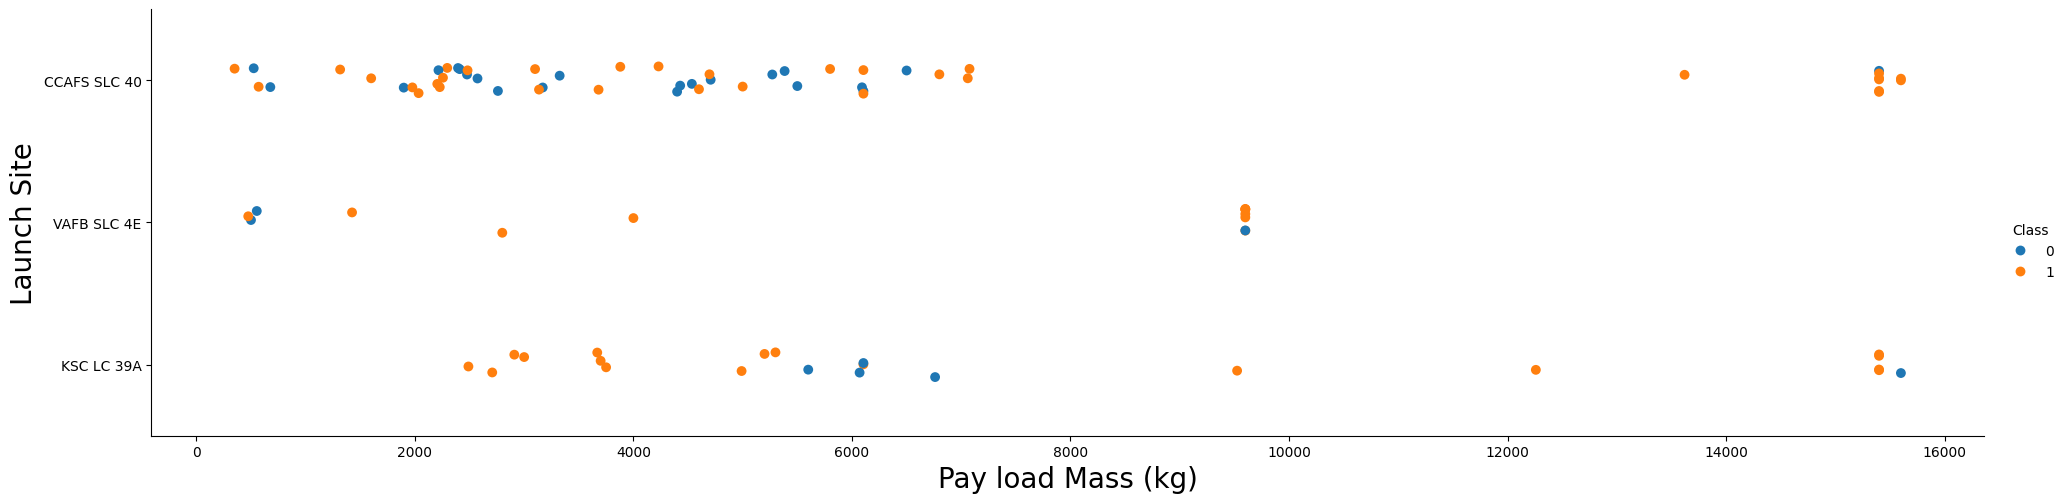

In [7]:
plt.figure(figsize=(8,3))
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, s=50, aspect = 4)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

### Success by Orbit Type (TASK 3)

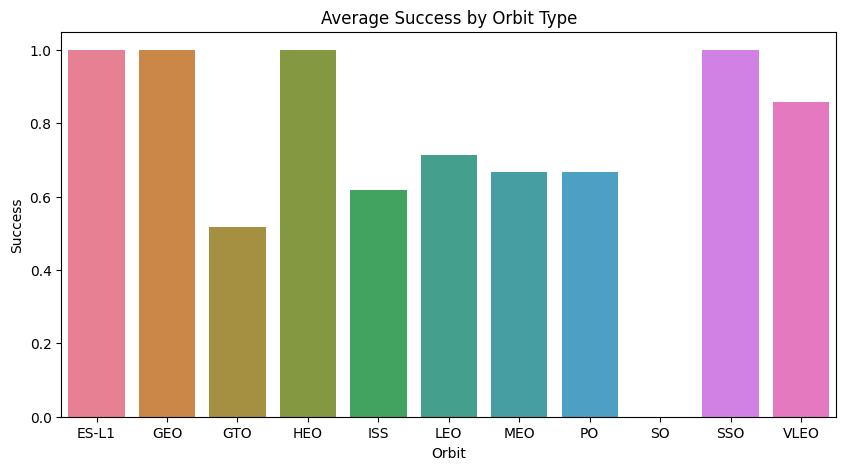

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x='Orbit', y='Class', hue='Orbit',  data=df.groupby('Orbit')['Class'].mean().reset_index())
plt.xlabel('Orbit')
plt.ylabel('Success')
plt.title('Average Success by Orbit Type')
plt.show()

### Orbit Type by Flight (TASK 4)

<Figure size 800x300 with 0 Axes>

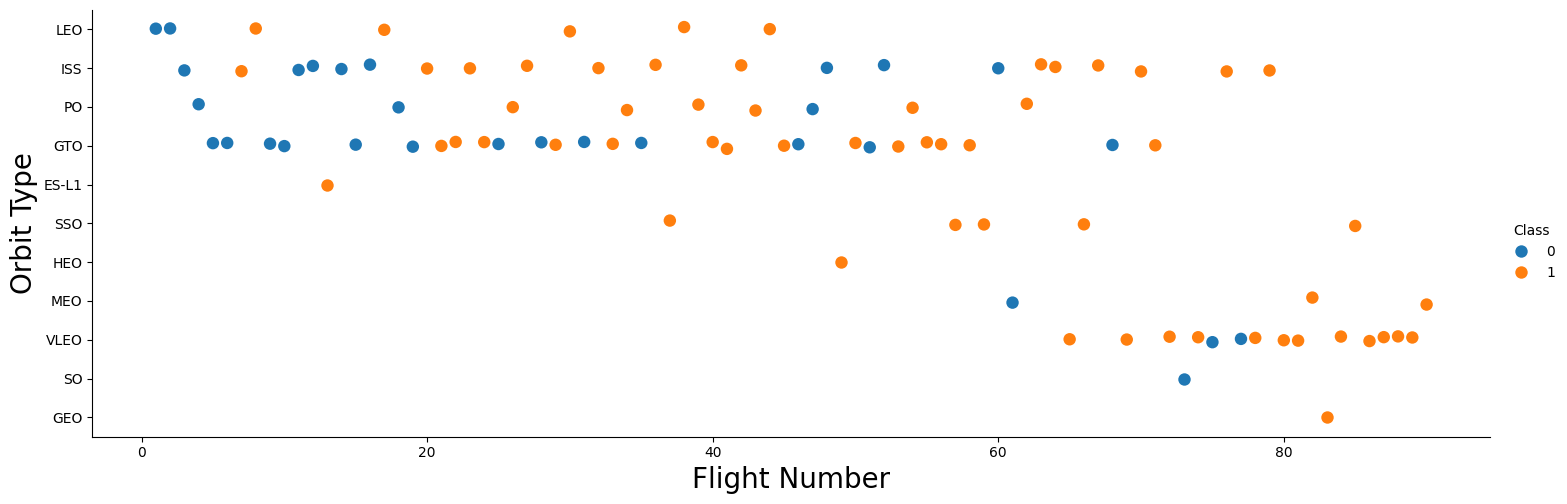

In [9]:
plt.figure(figsize=(8,3))
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, s = 80, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

### Orbit Type by Payload (TASK 5)

<Figure size 800x300 with 0 Axes>

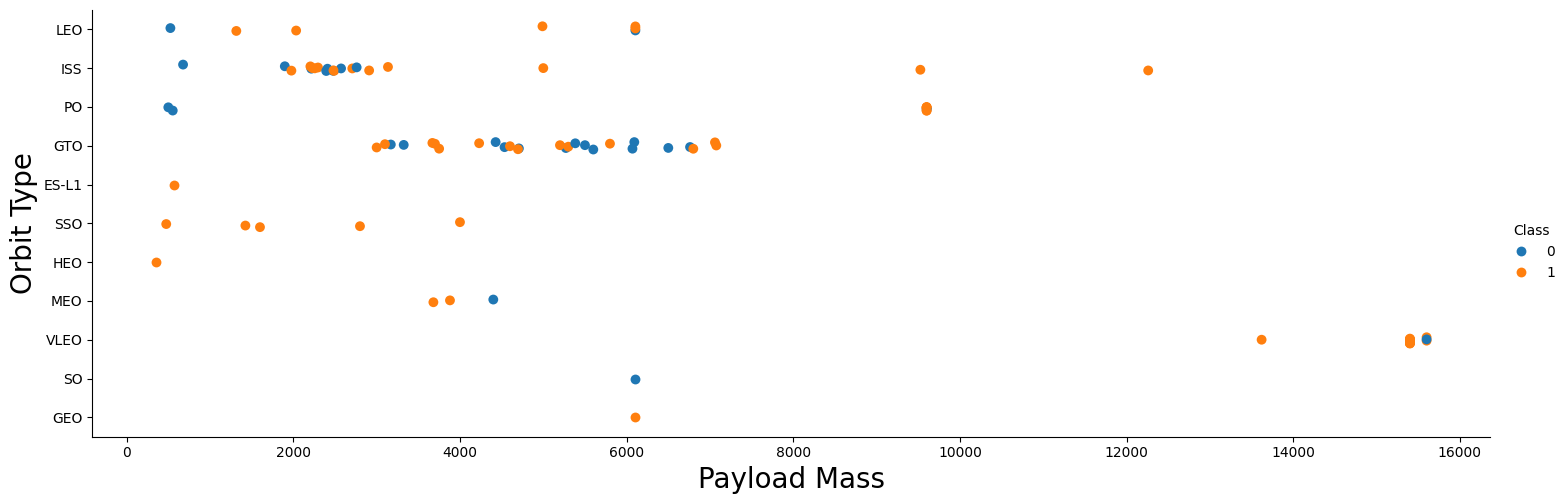

In [10]:
plt.figure(figsize=(8,3))
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, s=50, aspect = 3)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

### Success by Year (TASK 6)

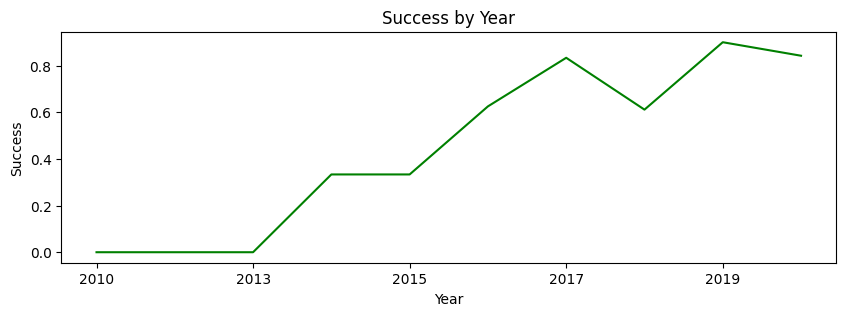

In [11]:
df_line = pd.DataFrame()
df_line = df_line.assign(Year = df.Date.apply(lambda x: x[:x.find('-')]))
df_line = df_line.assign(Success = df.Class)
df_line = df_line.groupby(['Year'])['Success'].mean()

plt.figure(figsize=(10,3))
df_line.plot(kind='line', color='green')
plt.xlabel('Year')
plt.ylabel('Success')
plt.title('Success by Year')
plt.show()

## Features Dataset

In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head(1)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003


### Numerically Categorize (TASK 7)

In [13]:
features_one_hot = pd.get_dummies(data=features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head(1)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
features_one_hot.shape

(90, 80)

In [15]:
features_one_hot.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056       bool
Serial_B1058       bool
Serial_B1059       bool
Serial_B1060       bool
Serial_B1062       bool
Length: 80, dtype: object

### Cast all numeric columns to `float64` (TASK  8)

In [16]:
features_one_hot = features_one_hot.astype(float)

In [17]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

## Save Data to CSV File

In [18]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)